## Q.) A construction company has released a few apartments in the market. Using the previous data about the scales of their apartments, they want to predict the category of people who might be interested in buying this

# Step 1 : Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
apt_data=pd.read_csv(r"E:\Git_repo\Logistic_House_data.csv")
apt_data.head()

,Gender,Age,Salary,Purchased
0,M,33,50000,0
1,F,28,45000,0
2,F,45,55000,1
3,M,65,80000,1
4,M,36,54000,0


In [3]:
apt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Gender       10 non-null object
Age          10 non-null int64
Salary       10 non-null int64
Purchased    10 non-null int64
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes


# Step 2 : Analyzing the Data

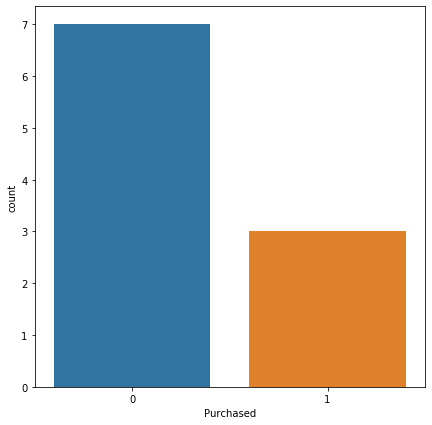

In [4]:
#How many of the people has bought the house
plt.figure(figsize=(7,7))
sns.countplot(x="Purchased",data=apt_data)

##### Number of people which has not brought the house are more

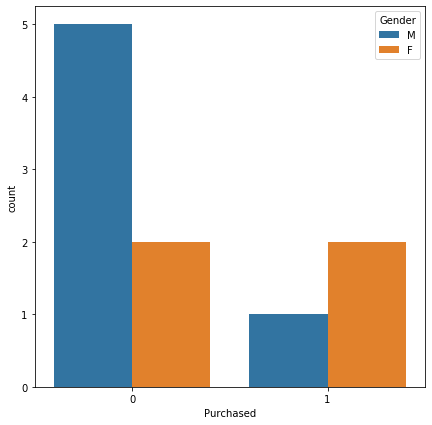

In [5]:
plt.figure(figsize=(7,7))
sns.countplot(x="Purchased",hue="Gender",data=apt_data)

##### Number of male who had bought the apratment are more then female

# Step 3 : Data Wrangling (Not required)

In [6]:
# Create a dummy variable for male & female
dummies_gen=pd.get_dummies(apt_data["Gender"],drop_first=True)
dummies_gen

,M
0,1
1,0
2,0
3,1
4,1
5,1
6,0
7,0
8,1
9,1


In [7]:
apt_data=pd.concat([apt_data,dummies_gen],axis=1)
apt_data

,Gender,Age,Salary,Purchased,M
0,M,33,50000,0,1
1,F,28,45000,0,0
2,F,45,55000,1,0
3,M,65,80000,1,1
4,M,36,54000,0,1
5,M,19,28000,0,1
6,F,69,64000,1,0
7,F,27,27000,0,0
8,M,39,85000,0,1
9,M,44,55690,0,1


In [8]:
apt_data=apt_data.drop("Gender",axis=1)
apt_data

,Age,Salary,Purchased,M
0,33,50000,0,1
1,28,45000,0,0
2,45,55000,1,0
3,65,80000,1,1
4,36,54000,0,1
5,19,28000,0,1
6,69,64000,1,0
7,27,27000,0,0
8,39,85000,0,1
9,44,55690,0,1


# Step 4 : Test & Train the Data

In [9]:
X=apt_data.drop("Purchased",axis=1)
y=apt_data["Purchased"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [10]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X,y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
model.score(X,y)

0.7

In [12]:
pred=model.predict(X_test)
pred

array([0, 1], dtype=int64)

In [13]:
from sklearn.metrics import classification_report
val=classification_report(y_test,pred)
val

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         1\n           1       1.00      1.00      1.00         1\n\n    accuracy                           1.00         2\n   macro avg       1.00      1.00      1.00         2\nweighted avg       1.00      1.00      1.00         2\n'

In [14]:
y_test.value_counts()

1    1
0    1
Name: Purchased, dtype: int64

In [15]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,pred))

[[1 0]
 [0 1]]


In [16]:
print(metrics.recall_score(y_test,pred))

1.0


# Step 5 : Check Accurcay

In [17]:
from sklearn.metrics import accuracy_score
val2=accuracy_score(y_test,pred)
val2

1.0